<link rel="stylesheet" href="stylesheet.css">

<body>
  <h1 class="title">Project 8</h1>
  <div class="container">
    <ul class="ul1">
      <li class="li_content">Task 1 : Download datasets </li>
      <li class="li_content">Task 2 : Dataset visualization </li>
      <ul class="ul2">
        <li class="sub_content">subtask 1 : plot graph</li>
        <li class="sub_content">subtask 2 : plot scatter </li>
      </ul>
      <li class="li_content">Task 3 : pre-process data for models </li>
      <ul class="ul2">
        <li class="sub_content">subtask 1 : Extract Target channels for use as feature</li>
        <li class="sub_content">subtask 2 : split each block to 6 sample (0.5 second for each) </li>
        <li class="sub_content">subtask 3 : Create target (y_train) - (character No / Yes) </li>
        <li class="sub_content">subtask 4 : concate y_train and x_train and shuffle data and split to train and test data</li>
        <li class="sub_content">subtask 5 : use min-max normalization on each block </li>
      </ul>      
      <li class="li_content">Task 4 : CNN model to predict (character Yes / No) </li>
      <ul class="ul2">
        <li class="sub_content">Model 1 :</li>
        <li class="sub_content">Model 2 :</li>
        <li class="sub_content">Model 3 :</li>
        <li class="sub_content">Model 4 :</li>
        <li class="sub_content">Model 5 :</li>
        <li class="sub_content">Model 6 :</li>
      </ul>      
    </ul>
  </div>
</body>

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Import Libraries
</h1>

In [1]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# import libraries :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# for read and write in dataset structure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy.io import loadmat


# to fetch dataset : 
import os
import requests

from scipy.signal import spectrogram

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import tensorflow as tf
from keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import activations




2023-12-20 14:52:09.209865: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-20 14:52:09.312404: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 14:52:10.078803: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 14:52:10.082112: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 14:52:12.405467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Download Dataset
</h1>

In [2]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# download dataset 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

github_username = 'darkrams98'
repo_name = 'Brain_Wave_Analysis_python'
file_name = 'ssvep_data_assignment.mat'
url = f'https://github.com/{github_username}/{repo_name}/raw/main/Project_Datasets/{file_name}'



# مسیر محل ذخیره فایل در سیستم
save_directory = 'Dataset'  # نام پوشه
save_path = os.path.join(save_directory, file_name)

# بررسی وجود پوشه و ایجاد آن اگر وجود نداشته باشد
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# بررسی وجود فایل
if not os.path.exists(save_path):
    # اگر فایل وجود نداشته باشد، دانلود کنید
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)
    if response.status_code == 200:
        print('The download was successful !')
    else:
        print('An error occurred while downloading !', response.status_code)
else:
    print('The file already exists !')


The file already exists !


In [3]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Load dataset :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# read data 
eeg_data = loadmat(save_path)


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Explore data structure
</h1>

In [4]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# print dataset structure :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# print keys :
print(eeg_data.keys())

# extract channel from dict : 
eeg_channels = eeg_data["channel"]       # array of string data (name of channels)
print(type(eeg_channels))
print(np.shape(eeg_channels))
# print(eeg_channels)

# extract comments :    
eeg_comments = eeg_data["comment"]          # dataset comment 
print(eeg_comments)

# extract freq : 
object_freq = eeg_data["freq"]
print(np.shape(object_freq))                # characters frequency 
# print(object_freq)

# extract fs : 
eeg_fs = eeg_data["fs"]
print(eeg_fs[0,0])                          # sampling frequency 

# extract phase : 
object_phase = eeg_data["phase"]
print(type(object_phase))
print(np.shape(object_phase))               # character phase 
# print(object_phase[0:10])

# extract eeg main data : 
eeg_wave = eeg_data["data"]                 # EEG (channel - time point - block - frequency_condition)
print(np.shape(eeg_wave))
print(type(eeg_wave))
print(len(eeg_wave))
print(eeg_wave[61,0,0,0])

dict_keys(['__header__', '__version__', '__globals__', 'channel', 'comment', 'data', 'freq', 'fs', 'phase'])
<class 'numpy.ndarray'>
(64, 1)
['data is 4-D matrix (channel × time point × block × frequency condition)']
(40, 1)
250
<class 'numpy.ndarray'>
(40, 1)
(64, 750, 4, 40)
<class 'numpy.ndarray'>
64
3.368392171081162



<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
channel selection
</h1>

In [5]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# define default parameter and functions 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

fs = 250
time_step = 1 / 250
n_trial = np.arange(0, 3, time_step)


# function (calculate character index by frequency)
def find_character_index (freq) :
    return int((freq - 8) / 0.2 + 1) - 1

# function (remove mean from data for input channel)
def cal_mean (eeg_data, freq) :
    # function (calculate mean of data)
    eeg_mean_block = []
    for f in freq :
        # extract phase : 
        eeg_selected_phase = eeg_data[:, :, find_character_index(f)]
        # print("shape of selected phase :\n",np.shape(eeg_selected_phase))
        # calculate mean :
        eeg_mean_block.append(np.mean(eeg_selected_phase, axis=1))
        # print("shape of mean : \n",np.shape(eeg_mean_block))
        
    return np.array(eeg_mean_block)


In [6]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# define function to select channel and extract channels data . 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# function to find selected channels index
def select_channel (all_channels , selected_channels) : 
    selected = []
    for channel in selected_channels :
        # print(channel)
        selected.append(np.where(all_channels == channel)[0])
    return selected

# function to extract channel data : 
def extract_selected_channels (eeg_main , channels_index) : 
    eeg_selected = []
    for index in channels_index : 
        eeg_selected.append(eeg_main[index, :, :, :])
    return np.array(eeg_selected)

In [7]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# use function to select channels and extract data . 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

target_channels = ['OZ', "PZ","POZ", "O1", "O2", "P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "PO7", "CB2", "CB1", "PO8", "PO3", "PO4", "PO6", "PO5"]
target_channels_index = select_channel(eeg_channels, target_channels)

print(target_channels_index)
print(len(target_channels))
print(len(target_channels_index))

# extract channels data : 
eeg_selected = extract_selected_channels(eeg_wave, target_channels_index)
print(np.shape(eeg_selected))
# reshape to main structure
eeg_selected = eeg_selected.reshape(21,750,4,40)
print(np.shape(eeg_selected))

[array([61]), array([47]), array([55]), array([60]), array([62]), array([46]), array([48]), array([45]), array([49]), array([44]), array([50]), array([43]), array([51]), array([52]), array([63]), array([59]), array([58]), array([54]), array([56]), array([57]), array([53])]
21
21
(21, 1, 750, 4, 40)
(21, 750, 4, 40)



<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
plot 2 sample for (8 and 12) frequency from OZ channel
</h1>

In [8]:
# Define target frequencies
target_frequencies = [12, 8]

# Define the target channel (Oz)
target_channel_index = np.where(eeg_channels == 'OZ')[0][0]

# remove channel dim
eeg_3d = eeg_wave[target_channel_index, :, :, :]
print("shape of channel OZ :\n",eeg_3d.shape)

shape of channel OZ :
 (750, 4, 40)


In [9]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# create subplot for each phase 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# set defaults 
Vertical_space = 40
# function to plot eeg signals
def plot_subplot(EEG_signal, time_axis) :
    for targt in range(EEG_signal.shape[0]):
      phase_signal = EEG_signal.iloc[targt, :] + targt * Vertical_space
      plt.plot(time_axis, phase_signal)
      EEG_label = ["EEG 8Hz character", "EEG 12Hz character"]
      eeg_pos = np.arange(EEG_signal.shape[0]) * Vertical_space
      plt.yticks(eeg_pos, EEG_label)
      plt.xlabel('Time(s)')
      plt.ylabel('Target Amplitude [$\mu V^2$]')
      plt.grid(True)
      plt.xlim([0,3])
      print(phase_signal.shape)
      plt.ylim([-phase_signal[:].min(),phase_signal[:].max()])
      plt.plot([0.5, 0.5],[-phase_signal[:].min(),phase_signal[:].max()], 'k', lw=1)
      plt.plot([2.5, 2.5],[-phase_signal[:].min(),phase_signal[:].max()], 'k', lw=1)


      # plt.title(f'EEG signal range {time_axis[0]} to {time_axis[-1]}')
      # savefig(f"./Plot/subplot_between {time_axis[0]} to {time_axis[-1]}", format="PNG")

    plt.show()

(2, 750)
(750,)
(750,)


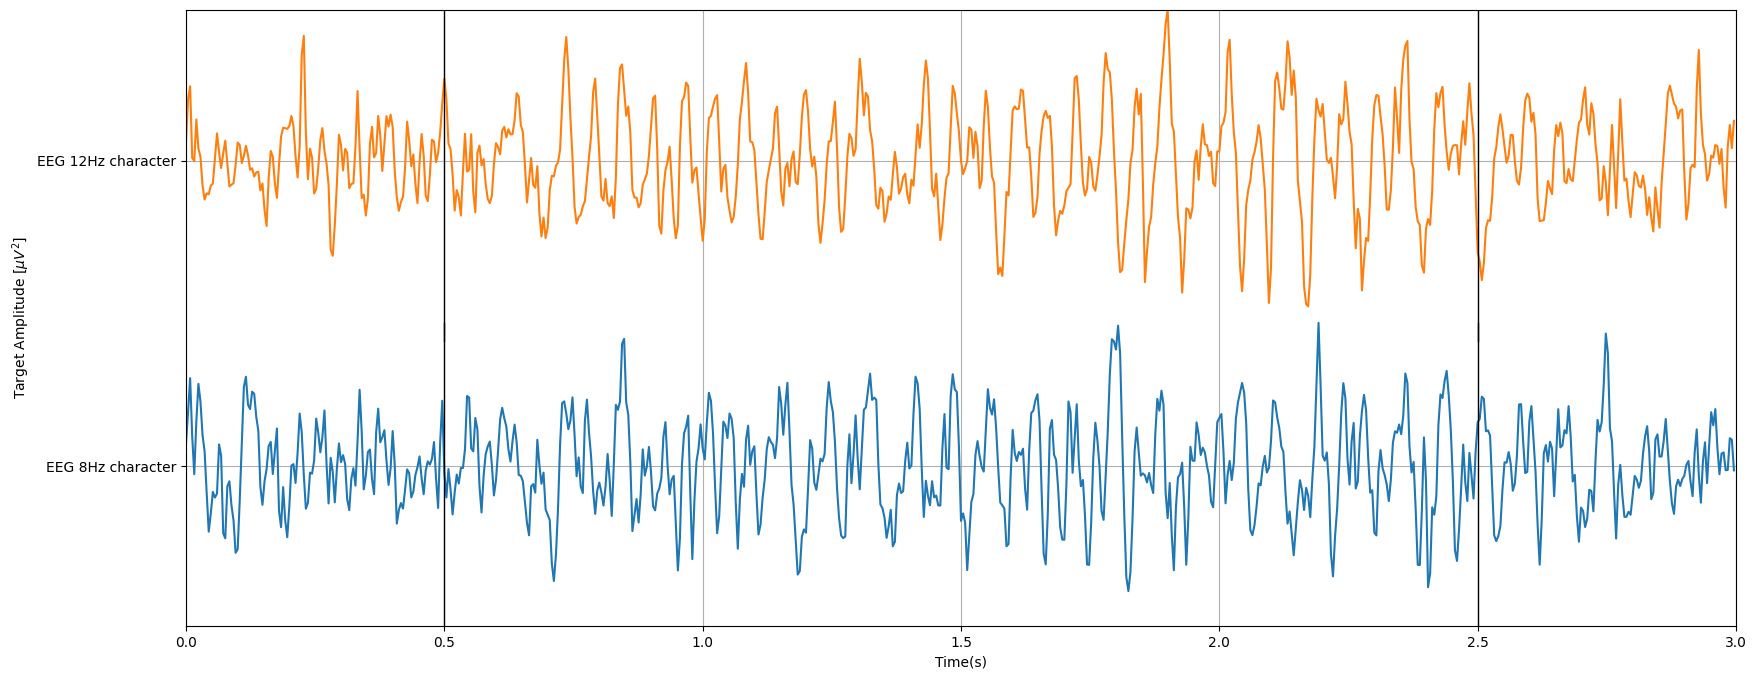

In [10]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot mean of 8 and 12 Hz characters 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plt.figure(figsize=(20, 8))

eeg_mean = cal_mean(eeg_3d, target_frequencies)
print(np.shape(eeg_mean))

# convert to dataframe :
eeg_mean_df = pd.DataFrame(eeg_mean)
plot_subplot(eeg_mean_df, n_trial)


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
plot spectrogram 2 sample for (8 and 12) frequency from OZ channel
</h1>

(126,)
(3,)
(126, 3)


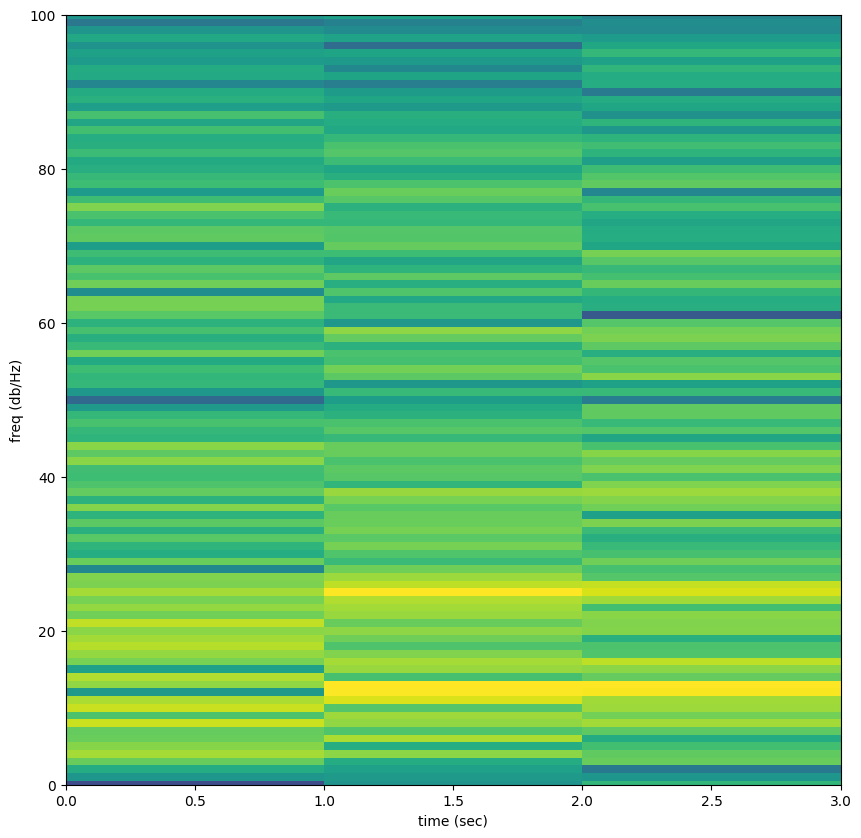

(126,)
(3,)
(126, 3)


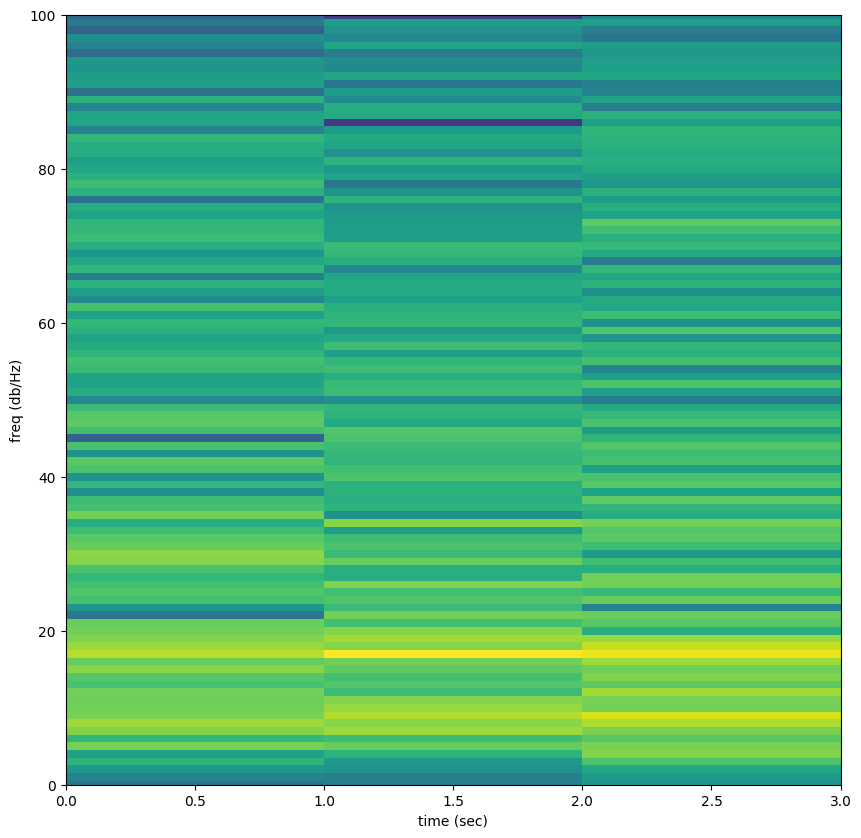

In [11]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # plot spectrogram 8 Hz mean signal of 4 block
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████ 

freqs, times, Sxx = spectrogram(eeg_mean[0,:],250, nperseg=250,noverlap=0)

print(np.shape(freqs))
print(np.shape(times))
print(np.shape(Sxx))

plt.figure(figsize=(10, 10))
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
plt.xlabel('time (sec)')
plt.ylabel('freq (db/Hz)')
plt.ylim([0,100])
plt.xlim([0,3])
plt.show()

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot spectrogram 12 Hz mean signal of 4 block
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

freqs, times, Sxx = spectrogram(eeg_mean[1,:],250, nperseg=250,noverlap=0)

print(np.shape(freqs))
print(np.shape(times))
print(np.shape(Sxx))

plt.figure(figsize=(10, 10))
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
plt.xlabel('time (sec)')
plt.ylabel('freq (db/Hz)')
plt.ylim([0,100])
plt.xlim([0,3])
plt.show()


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Create dataset and pre-process eeg signals
</h1>

In [12]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# convert (reshape) 3 second to 6 0.5 seconds with (125 samples)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# target sub-eeg data
target_trials = [[0, 125], [125, 250], [250, 375], [375, 500], [500, 625], [625, 750]]

# reshape eeg selected : 
eeg_selected_5D = eeg_selected.reshape(21,6,125,4,40)
print(np.shape(eeg_selected_5D))

(21, 6, 125, 4, 40)


In [13]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# convert 4 block with random 40 character to 160 block of 0.5 second
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

reshaped_data = eeg_selected_5D.reshape(21,6,125,160)
print(np.shape(reshaped_data))

(21, 6, 125, 160)


In [14]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# create y_data
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# create y_data for 1 trial [0,1,1,1,1,0] ⟶⟶⟶ 0 for no-character and 1 for character
initial_array = np.array([0, 1, 1, 1, 1, 0])
# create 160 length array with y_data
result_array = np.tile(initial_array, 160)
# reshape array to 2D array for each 0.5 second
result_array_2d = result_array.reshape((160, len(initial_array)))
print(np.shape(result_array_2d))
print(np.shape(result_array))
print(result_array.reshape(1,960))

(160, 6)
(960,)
[[0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
  0 1 1 1 1 0 0 1 1 1 

In [15]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# reshape and create x_data
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

reshaped_data_channels = reshaped_data.reshape(21,125,960)
print(np.shape(reshaped_data_channels))

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# create x_data
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# ۱ - Concatenate داده‌ها
concatenated_data = np.concatenate([reshaped_data_channels.transpose(2, 0, 1).reshape(960, -1), result_array.reshape(-1, 1)], axis=1)

# ۲ - Shuffle داده‌ها
np.random.shuffle(concatenated_data)

# transpose and convert to main data structure
shuffled_x_train = concatenated_data[:, :-1].reshape(960, 125, 21).transpose(0 ,1, 2)
shuffled_y_train = concatenated_data[:, -1]

# نمایش ابعاد داده‌های حاصل
print("Shape of shuffled_x_train:", shuffled_x_train.shape)
print("Shape of shuffled_y_train:", shuffled_y_train.shape)


(21, 125, 960)
Shape of shuffled_x_train: (960, 125, 21)
Shape of shuffled_y_train: (960,)


In [20]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# shuffle data and split data to train and test data 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# اجرای One-Hot Encoding روی y_train
y_train_one_hot = to_categorical(shuffled_y_train, num_classes=2)  # num_classes برابر با تعداد دسته‌ها


# # تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
# x_train, x_test, y_train, y_test = train_test_split(shuffled_x_train, shuffled_y_train, test_size=0.2, random_state=42)
# y_train, y_test = np.array(y_train, dtype=int), np.array(y_test, dtype=bool)

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Use this for suftmax layer   
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# for softmax models :
x_train, x_test, y_train, y_test = train_test_split(shuffled_x_train, y_train_one_hot, test_size=0.2, random_state=42)
y_train, y_test = np.array(y_train, dtype=int), np.array(y_test, dtype=int)




<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Model 1 (CNN)
</h1>

In [17]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Create model (CNN Model) - with no pooling layer .
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████


# ایجاد مدل
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(125, 21)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# آموزش مدل
model.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# ارزیابی مدل
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# محاسبه ماتریس اشتباهات
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)



2023-12-20 14:54:22.057189: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-20 14:54:22.059057: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
62/62 [==============================] - 3s 14ms/step - loss: 1.4135 - accuracy: 0.5521 - val_loss: 0.9530 - val_accuracy: 0.4481
Epoch 2/50
62/62 [==============================] - 1s 9ms/step - loss: 0.6791 - accuracy: 0.6694 - val_loss: 0.9876 - val_accuracy: 0.4026
Epoch 3/50
62/62 [==============================] - 1s 9ms/step - loss: 0.5145 - accuracy: 0.7606 - val_loss: 1.1344 - val_accuracy: 0.3442
Epoch 4/50
62/62 [==============================] - 1s 9ms/step - loss: 0.4739 - accuracy: 0.7687 - val_loss: 1.2401 - val_accuracy: 0.3961
Epoch 5/50
62/62 [==============================] - 1s 9ms/step - loss: 0.3692 - accuracy: 0.8388 - val_loss: 1.5106 - val_accuracy: 0.3052
Epoch 6/50
62/62 [==============================] - 1s 9ms/step - loss: 0.2603 - accuracy: 0.9007 - val_loss: 1.6737 - val_accuracy: 0.3701
Epoch 7/50
62/62 [==============================] - 1s 9ms/step - loss: 0.1647 - accuracy: 0.9511 - val_loss: 1.7775 - val_accuracy: 0.3312
Epoch 8/50
62/62 [=


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Model 2 (CNN with self define norm function)
</h1>

In [18]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# define normalization function 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

def cecotti_normal(shape, dtype = None, partition_info = None):
    '''
    Initializer proposed by Cecotti et al. 2011:
    https://ieeexplore.ieee.org/document/5492691
    '''
    if len(shape) == 1:
        fan_in = shape[0]
    elif len(shape) == 2:
        fan_in = shape[0]
    else:
        receptive_field_size = 1
        for dim in shape[:-2]:
            receptive_field_size *= dim
        fan_in = shape[-2] * receptive_field_size
  
    return K.random_normal(shape, mean = 0.0, stddev = (1.0 / fan_in))


def scaled_tanh(z):
    '''
    Scaled hyperbolic tangent activation function, as proposed
    by Lecun 1989:
    http://yann.lecun.com/exdb/publis/pdf/lecun-89.pdf

    See also Lecun et al. 1998:
    http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf 
    '''
    return 1.7159 * K.tanh((2.0 / 3.0) * z)

get_custom_objects().update({'scaled_tanh': Activation(scaled_tanh)})



In [21]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Model 2 - CNN model with 2 conv layer  
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

def CNN1(Chans = 6, Samples = 206):
    eeg_input    = Input(shape = (Samples, Chans))
    
    block1       = Conv1D(10, 1, padding = 'same',
                          data_format = 'channels_last',
                          bias_initializer = cecotti_normal,
                          kernel_initializer = cecotti_normal,
                          use_bias = True)(eeg_input)
    block1       = Activation('scaled_tanh')(block1)

    block1       = Conv1D(50, 13, padding = 'same',
                          data_format = 'channels_last',
                          bias_initializer = cecotti_normal,
                          kernel_initializer = cecotti_normal,
                          use_bias = True)(block1)
    block1       = Activation('scaled_tanh')(block1)
    
    flatten      = Flatten(name = 'flatten')(block1)
    dense        = Dense(100, activation = 'sigmoid')(flatten)
    prediction   = Dense(2, activation = 'softmax')(dense)
    
    return Model(inputs = eeg_input, outputs = prediction, name = 'CNN1')

my_model = CNN1(Chans=21, Samples=125)

my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics.categorical_accuracy)

# آموزش مدل
my_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_proba = my_model.predict(x_test)
print(y_proba)

# Convert probabilities to binary predictions
y_pred_binary = np.round(y_proba).astype(int)

# Assuming y_test is in one-hot encoded format, convert it to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, np.argmax(y_pred_binary, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, np.argmax(y_pred_binary, axis=1))
print("Accuracy:", accuracy)


Epoch 1/10
20/20 [==============================] - 2s 38ms/step - loss: 0.6774 - categorical_accuracy: 0.6661 - val_loss: 0.7084 - val_categorical_accuracy: 0.6299
Epoch 2/10
20/20 [==============================] - 0s 23ms/step - loss: 0.6019 - categorical_accuracy: 0.6889 - val_loss: 0.7606 - val_categorical_accuracy: 0.5130
Epoch 3/10
20/20 [==============================] - 0s 23ms/step - loss: 0.5509 - categorical_accuracy: 0.7085 - val_loss: 0.8300 - val_categorical_accuracy: 0.5130
Epoch 4/10
20/20 [==============================] - 0s 24ms/step - loss: 0.5063 - categorical_accuracy: 0.7410 - val_loss: 0.9958 - val_categorical_accuracy: 0.4286
Epoch 5/10
20/20 [==============================] - 0s 24ms/step - loss: 0.4612 - categorical_accuracy: 0.7785 - val_loss: 1.0856 - val_categorical_accuracy: 0.4091
Epoch 6/10
20/20 [==============================] - 0s 23ms/step - loss: 0.4208 - categorical_accuracy: 0.8127 - val_loss: 1.2315 - val_categorical_accuracy: 0.4026
Epoch 7/10


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Model 3 (CNN with self define norm function) + softmax
</h1>

In [22]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Model 3 (CNN with softmax)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

def UCNN1(Chans = 6, Samples = 206):
    eeg_input    = Input(shape = (Samples, Chans))
    
    block1       = Conv1D(10, 1, padding = 'same',
                          data_format = 'channels_last',
                          bias_initializer = cecotti_normal,
                          kernel_initializer = cecotti_normal,
                          use_bias = True)(eeg_input)
    block1       = Activation('scaled_tanh')(block1)

    block1       = Conv1D(20, 5, padding = 'same',
                          data_format = 'channels_last',
                          bias_initializer = cecotti_normal,
                          kernel_initializer = cecotti_normal,
                          use_bias = True)(block1)
    block1       = Activation('scaled_tanh')(block1)
    
    flatten      = Flatten(name = 'flatten')(block1)
    dense        = Dense(20, activation = 'relu')(flatten)
    dense        = Dense(2)(dense)
    softmax      = Activation('softmax', name = 'softmax')(dense)
        
    return Model(inputs = eeg_input, outputs = softmax, name = 'UCNN1')

my_model = UCNN1(Chans=21, Samples=125)


my_model.compile(loss='mean_squared_logarithmic_error', optimizer='adam',
              metrics=[metrics.mae,
                       metrics.categorical_accuracy])

# آموزش مدل
my_model.fit(x_train, y_train, epochs=30, batch_size=30, validation_split=0.2)

y_proba = my_model.predict(x_test)
print(y_proba)

# Convert probabilities to binary predictions
y_pred_binary = np.round(y_proba).astype(int)

# Assuming y_test is in one-hot encoded format, convert it to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, np.argmax(y_pred_binary, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, np.argmax(y_pred_binary, axis=1))
print("Accuracy:", accuracy)

Epoch 1/30
21/21 [==============================] - 3s 38ms/step - loss: 0.1192 - mean_absolute_error: 0.4540 - categorical_accuracy: 0.6694 - val_loss: 0.1224 - val_mean_absolute_error: 0.4496 - val_categorical_accuracy: 0.6558
Epoch 2/30
21/21 [==============================] - 0s 10ms/step - loss: 0.0975 - mean_absolute_error: 0.4052 - categorical_accuracy: 0.6840 - val_loss: 0.1313 - val_mean_absolute_error: 0.4823 - val_categorical_accuracy: 0.6234
Epoch 3/30
21/21 [==============================] - 0s 10ms/step - loss: 0.0852 - mean_absolute_error: 0.3708 - categorical_accuracy: 0.7476 - val_loss: 0.1473 - val_mean_absolute_error: 0.5073 - val_categorical_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 0s 10ms/step - loss: 0.0710 - mean_absolute_error: 0.3247 - categorical_accuracy: 0.8062 - val_loss: 0.1608 - val_mean_absolute_error: 0.5272 - val_categorical_accuracy: 0.4286
Epoch 5/30
21/21 [==============================] - 0s 10ms/step - loss: 0.0540 - me


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:30px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Model 4 (CNN with self define norm function) + softmax + new accuracy method 
</h1>

In [23]:
def CNN3(Chans = 6, Samples = 206):
    eeg_input    = Input(shape = (Samples, Chans))
    
    block1       = Conv1D(1, 1, padding = 'same',
                          data_format = 'channels_last',
                          bias_initializer = cecotti_normal,
                          kernel_initializer = cecotti_normal,
                          use_bias = True)(eeg_input)
    block1       = Activation('scaled_tanh')(block1)

    block1       = Conv1D(50, 13, padding = 'same',
                          data_format = 'channels_last',
                          bias_initializer = cecotti_normal,
                          kernel_initializer = cecotti_normal,
                          use_bias = True)(block1)
    block1       = Activation('scaled_tanh')(block1)
    
    flatten      = Flatten(name = 'flatten')(block1)
    dense        = Dense(100, activation = 'sigmoid')(flatten)
    prediction   = Dense(2, activation = 'softmax')(dense)
    
    return Model(inputs = eeg_input, outputs = prediction, name = 'CNN1')

my_model = CNN3(21,125)

my_model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=[metrics.mae,
                       metrics.categorical_accuracy])

# آموزش مدل
my_model.fit(x_train, y_train, epochs=30, batch_size=5, validation_split=0.2)

# Convert probabilities to binary predictions
y_pred_binary = np.round(y_proba).astype(int)

# Assuming y_test is in one-hot encoded format, convert it to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, np.argmax(y_pred_binary, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, np.argmax(y_pred_binary, axis=1))
print("Accuracy:", accuracy)

Epoch 1/30
123/123 [==============================] - 4s 18ms/step - loss: 0.3217 - mean_absolute_error: 0.3584 - categorical_accuracy: 0.6498 - val_loss: 0.3464 - val_mean_absolute_error: 0.3745 - val_categorical_accuracy: 0.6429
Epoch 2/30
123/123 [==============================] - 2s 15ms/step - loss: 0.2433 - mean_absolute_error: 0.4174 - categorical_accuracy: 0.6629 - val_loss: 0.2339 - val_mean_absolute_error: 0.4392 - val_categorical_accuracy: 0.6558
Epoch 3/30
123/123 [==============================] - 2s 16ms/step - loss: 0.2216 - mean_absolute_error: 0.4296 - categorical_accuracy: 0.6612 - val_loss: 0.2553 - val_mean_absolute_error: 0.4939 - val_categorical_accuracy: 0.5649
Epoch 4/30
123/123 [==============================] - 2s 15ms/step - loss: 0.2153 - mean_absolute_error: 0.4204 - categorical_accuracy: 0.6710 - val_loss: 0.2630 - val_mean_absolute_error: 0.4264 - val_categorical_accuracy: 0.6494
Epoch 5/30
123/123 [==============================] - 2s 16ms/step - loss: 0


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:25px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Model 5 (CNN with self define norm function) + softmax + 3 conv1D layer
</h1>

In [25]:
def streg(a):
    return 0.01 * K.sum(K.square(a[:, 1:, :] - a[:, :-1, :]))

def CNNR(Chans = 6, Samples = 206):
    eeg_input   = Input(shape = (Samples, Chans))

    block1       = Conv1D(96, 1, padding = 'valid', activity_regularizer = streg, use_bias = True)(eeg_input)
    block1       = Activation('relu')(block1)
    block1       = MaxPooling1D(3, strides = 2)(block1)
    
    block2       = Conv1D(128, 6, padding = 'valid', use_bias = True)(block1)
    block2       = Activation('relu')(block2)
    block2       = MaxPooling1D(3, strides = 2)(block2)
    
    block3       = Conv1D(128, 6, padding = 'valid', use_bias = True)(block2)
    block3       = Activation('relu')(block3)   
    
    flatten      = Flatten(name = 'flatten')(block3)
    dense1       = Dense(125, activation = 'relu')(flatten)
    dense1       = Dropout(0.2)(dense1)
    dense2       = Dense(75, activation = 'relu')(dense1)
    dense2       = Dropout(0.2)(dense2)
    output       = Dense(2)(dense2)
    softmax      = Activation('softmax', name = 'softmax')(output)
        
    return Model(inputs = eeg_input, outputs = softmax, name = 'CNNR')

my_model = CNNR(Chans=21, Samples=125)

my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# آموزش مدل
my_model.fit(x_train, y_train, epochs=10, batch_size=12, validation_split=0.2)

# ارزیابی مدل
y_pred = my_model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# # Uncomment if using sigmoid activation
# conf_matrix = confusion_matrix(y_test, y_pred_binary)
# print("Confusion Matrix:")
# print(conf_matrix)

# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Epoch 1/10
52/52 [==============================] - 4s 33ms/step - loss: 4445.2812 - accuracy: 0.6580 - val_loss: 3031.4502 - val_accuracy: 0.6558
Epoch 2/10
52/52 [==============================] - 1s 25ms/step - loss: 2046.0781 - accuracy: 0.6726 - val_loss: 1359.3650 - val_accuracy: 0.6558
Epoch 3/10
52/52 [==============================] - 1s 24ms/step - loss: 897.8979 - accuracy: 0.6726 - val_loss: 579.6901 - val_accuracy: 0.6558
Epoch 4/10
52/52 [==============================] - 1s 24ms/step - loss: 373.9999 - accuracy: 0.6726 - val_loss: 233.5745 - val_accuracy: 0.6558
Epoch 5/10
52/52 [==============================] - 1s 24ms/step - loss: 147.7369 - accuracy: 0.6726 - val_loss: 89.1871 - val_accuracy: 0.6558
Epoch 6/10
52/52 [==============================] - 1s 24ms/step - loss: 55.1039 - accuracy: 0.6726 - val_loss: 32.6235 - val_accuracy: 0.6558
Epoch 7/10
52/52 [==============================] - 1s 24ms/step - loss: 19.8284 - accuracy: 0.6726 - val_loss: 11.4881 - val_acc


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:25px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Model 6 (CNN with self define norm function) + softmax + L2 norm
</h1>

In [26]:
from tensorflow.keras.regularizers import l2

def OCLNN(Chans = 6, Samples = 206):
    eeg_input    = Input(shape = (Samples, Chans))

    padded       = ZeroPadding1D(padding = 2)(eeg_input)
    block1       = Conv1D(16, 14, strides = 14,
                          padding = 'valid',
                          data_format = 'channels_last',
                          kernel_initializer = 'glorot_uniform',
                          bias_initializer = 'zeros',
                          kernel_regularizer = l2(l = 0.01),
                          bias_regularizer = l2(l = 0.01),
                          use_bias = True)(padded)
    block1       = Activation('relu')(block1)
    block1       = Dropout(0.25)(block1)
    flatten      = Flatten(name = 'flatten')(block1)
    dense        = Dense(2)(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs = eeg_input, outputs = softmax, name = 'OCLNN')


my_model = OCLNN(Chans=21, Samples=125)

my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# آموزش مدل
my_model.fit(x_train, y_train, epochs=50, batch_size=12, validation_split=0.2)

# ارزیابی مدل
y_pred = my_model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# # Use if you are using sigmoid activation function 
# conf_matrix = confusion_matrix(y_test, y_pred_binary)
# print("Confusion Matrix:")
# print(conf_matrix)

# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Epoch 1/50
52/52 [==============================] - 2s 14ms/step - loss: 3.9448 - accuracy: 0.5179 - val_loss: 2.9921 - val_accuracy: 0.5649
Epoch 2/50
52/52 [==============================] - 0s 6ms/step - loss: 2.7488 - accuracy: 0.6336 - val_loss: 2.7101 - val_accuracy: 0.5325
Epoch 3/50
52/52 [==============================] - 0s 6ms/step - loss: 2.1291 - accuracy: 0.6759 - val_loss: 2.6194 - val_accuracy: 0.5455
Epoch 4/50
52/52 [==============================] - 0s 6ms/step - loss: 1.6757 - accuracy: 0.7020 - val_loss: 2.5190 - val_accuracy: 0.5390
Epoch 5/50
52/52 [==============================] - 0s 6ms/step - loss: 1.4041 - accuracy: 0.7410 - val_loss: 2.5025 - val_accuracy: 0.4935
Epoch 6/50
52/52 [==============================] - 0s 6ms/step - loss: 1.3419 - accuracy: 0.7410 - val_loss: 2.4673 - val_accuracy: 0.4740
Epoch 7/50
52/52 [==============================] - 0s 6ms/step - loss: 1.0624 - accuracy: 0.7785 - val_loss: 2.5160 - val_accuracy: 0.5390
Epoch 8/50
52/52 [=


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:25px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Model 7 (CNN with self define norm function) + softmax + L2 norm
</h1>

In [27]:
def SepConv1D(Chans = 6, Samples = 206, Filters = 32):
  eeg_input    = Input(shape = (Samples, Chans))

  padded       = ZeroPadding1D(padding = 4)(eeg_input)
  block1       = SeparableConv1D(Filters, 16, strides = 8,
                                 padding = 'valid',
                                 data_format = 'channels_last',
                                 kernel_initializer = 'glorot_uniform',
                                 bias_initializer = 'zeros',
                                 use_bias = True)(padded)
  block1       = Activation('tanh')(block1)
  flatten      = Flatten(name = 'flatten')(block1)
  prediction   = Dense(2, activation = 'softmax')(flatten)

  return Model(inputs = eeg_input, outputs = prediction, name='SepConv1D')  


my_model = SepConv1D(Chans=21, Samples=125)

my_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'binary_accuracy'])


# آموزش مدل
my_model.fit(x_train, y_train, epochs=50, batch_size=12, validation_split=0.2)

# ارزیابی مدل
y_pred = my_model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# # use this accuracy if using sigmoid activation fucntion 
# conf_matrix = confusion_matrix(y_test, y_pred_binary)
# print("Confusion Matrix:")
# print(conf_matrix)

# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Epoch 1/50
52/52 [==============================] - 2s 12ms/step - loss: 0.3211 - accuracy: 0.5000 - binary_accuracy: 0.5000 - val_loss: 0.3540 - val_accuracy: 0.4935 - val_binary_accuracy: 0.4935
Epoch 2/50
52/52 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.6450 - binary_accuracy: 0.6450 - val_loss: 0.3490 - val_accuracy: 0.5260 - val_binary_accuracy: 0.5260
Epoch 3/50
52/52 [==============================] - 0s 6ms/step - loss: 0.1967 - accuracy: 0.7150 - binary_accuracy: 0.7150 - val_loss: 0.3556 - val_accuracy: 0.4740 - val_binary_accuracy: 0.4740
Epoch 4/50
52/52 [==============================] - 0s 6ms/step - loss: 0.1699 - accuracy: 0.7785 - binary_accuracy: 0.7785 - val_loss: 0.3645 - val_accuracy: 0.4740 - val_binary_accuracy: 0.4740
Epoch 5/50
52/52 [==============================] - 0s 6ms/step - loss: 0.1492 - accuracy: 0.8322 - binary_accuracy: 0.8322 - val_loss: 0.3707 - val_accuracy: 0.4610 - val_binary_accuracy: 0.4610
Epoch 6/50
52/52 [=